In [1]:
import pandas as pd


if __name__ == '__main__':

	df_aaup    = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/aaup.data', header=None)
	df_usnews  = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/usnews.data', header=None)

aaup = df_aaup.rename(columns={
    0: 'FICE',
    1: 'College name',
    2: 'State',
    3: 'Type',
    4: 'Avg salary - full prof',
    5: 'Avg salary - assoc prof',
    6: 'Avg salary - asst prof',
    7: 'Avg salary - all ranks',
    8: 'Avg compensation - full prof',
    9: 'Avg compensation - assoc prof',
    10: 'Avg compensation - asst prof',
    11: 'Avg compensation - all ranks',
    12: 'No. of full prof',
    13: 'No. of assoc prof',
    14: 'No. of asst prof',
    15: 'No. of instructors',
    16: 'No. of faculty - all ranks'
})

new_names = ['fice', 'college_name', 'state', 'public_private', 'math_sat_avg', 'verbal_sat_avg',
             'combined_sat_avg', 'act_avg', 'math_sat_1st_quart', 'math_sat_3rd_quart',
             'verbal_sat_1st_quart', 'verbal_sat_3rd_quart', 'act_1st_quart', 'act_3rd_quart',
             'num_applications_received', 'num_applicants_accepted', 'num_new_students_enrolled',
             'pct_new_students_top_10', 'pct_new_students_top_25', 'num_fulltime_undergrads',
             'num_parttime_undergrads', 'instate_tuition', 'outstate_tuition', 'room_board_cost',
             'room_cost', 'board_cost', 'additional_fees', 'estimated_book_costs',
             'estimated_personal_spending', 'pct_faculty_phd', 'pct_faculty_terminal_degree',
             'student_faculty_ratio', 'pct_alumni_donate', 'instructional_expense_per_student',
             'graduation_rate']

usnews = df_usnews.rename(columns=dict(enumerate(new_names)))

cols=['math_sat_avg', 'verbal_sat_avg',
             'combined_sat_avg', 'act_avg', 'math_sat_1st_quart', 'math_sat_3rd_quart',
             'verbal_sat_1st_quart', 'verbal_sat_3rd_quart', 'act_1st_quart', 'act_3rd_quart',
             'num_applications_received', 'num_applicants_accepted', 'num_new_students_enrolled',
             'pct_new_students_top_10', 'pct_new_students_top_25', 'num_fulltime_undergrads',
             'num_parttime_undergrads', 'instate_tuition', 'outstate_tuition', 'room_board_cost',
             'room_cost', 'board_cost', 'additional_fees', 'estimated_book_costs',
             'estimated_personal_spending', 'pct_faculty_phd', 'pct_faculty_terminal_degree',
             'student_faculty_ratio', 'pct_alumni_donate', 'instructional_expense_per_student',
             'graduation_rate']
usnews[cols] = usnews[cols].apply(pd.to_numeric, errors='coerce', axis=1)
usnews['TotalExp']=usnews['instate_tuition']+usnews['room_board_cost']+usnews['room_cost']+ usnews['board_cost']+ usnews['additional_fees']+ usnews['estimated_book_costs']+usnews['estimated_personal_spending']


# usnews.to_csv('usnewsread.csv', index=False)
# aaup.to_csv('aaupread.csv', index=False)
print(usnews)


       fice                       college_name state  public_private  \
0      1061          Alaska Pacific University    AK               2   
1      1063  University of Alaska at Fairbanks    AK               1   
2      1065     University of Alaska Southeast    AK               1   
3     11462  University of Alaska at Anchorage    AK               1   
4      1002        Alabama Agri. & Mech. Univ.    AL               1   
...     ...                                ...   ...             ...   
1297   3826        West Virginia State College    WV               1   
1298   3827           West Virginia University    WV               1   
1299   3830     West Virginia Wesleyan College    WV               2   
1300   3831            Wheeling Jesuit College    WV               2   
1301   3932              University of Wyoming    WY               1   

      math_sat_avg  verbal_sat_avg  combined_sat_avg  act_avg  \
0            490.0           482.0             972.0     20.0   
1    

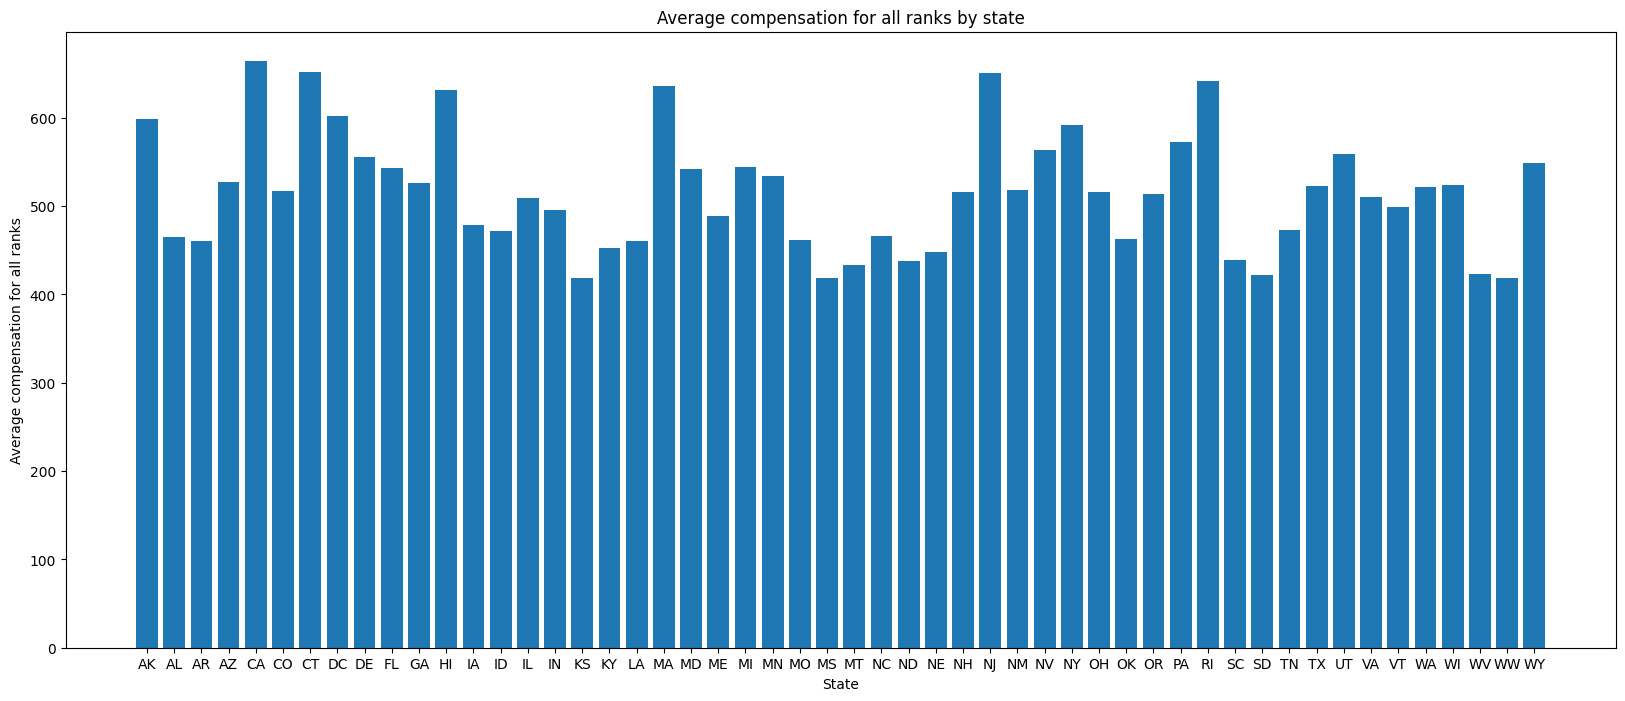

In [3]:
import matplotlib.pyplot as plt
state_compensation = aaup.groupby('State')['Avg compensation - all ranks'].mean()

plt.figure(figsize=(20,8))
plt.bar(state_compensation.index, state_compensation.values)
plt.xlabel('State')
plt.ylabel('Average compensation for all ranks')
plt.title('Average compensation for all ranks by state')
plt.show()